# DNS LOAN PREDICTION CHALLENGE

## 1.0 Description of the challenge:

SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative. Its assessment approach is based on two main risk drivers of loan default prediction:.
- 1) willingness to pay and 
- 2) ability to pay. Since not all customers pay back, the company invests in experienced data scientist to build robust models to effectively predict the odds of repayment.

These two fundamental drivers need to be determined at the point of each application to allow the credit grantor to make a calculated decision based on repayment odds, which in turn determines if an applicant should get a loan, and if so - what the size, price and tenure of the offer will be.

There are two types of risk models in general: New business risk, which would be used to assess the risk of application(s) associated with the first loan that he/she applies. The second is a repeat or behaviour risk model, in which case the customer has been a client and applies for a repeat loan. In the latter case - we will have additional performance on how he/she repaid their prior loans, which we can incorporate into our risk model.

It is your job to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.

### 1.1 Problem

This competition is a supervised classification machine learning task. The objective is to use historical financial and socioeconomic data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

* __Supervised__: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
* __Classification__: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

### 1.2 Description of the data

There are 3 different datasets for both train and test

#### 1.2.1 Demographic data (traindemographics.csv)
- customerid (Primary key used to merge to other data)
- birthdate (date of birth of the customer)
- bank_account_type (type of primary bank account)
- longitude_gps
- latitude_gps
- bank_name_clients (name of the bank)
- bank_branch_clients (location of the branch - not compulsory - so missing in a lot of the cases)
- employment_status_clients (type of employment that customer has)
- level_of_education_clients (highest level of education)

#### 1.2.2 Performance data (trainperf.csv) : 
This is the repeat loan that the customer has taken for which we need to predict the performance of. Basically, we need to predict if whether this loan would default given all previous loans and demographics of a customer.
- customerid (Primary key used to merge to other data)
- systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- loannumber (The number of the loan that you have to predict)
- approveddate (Date that loan was approved)
- creationdate (Date that loan application was created)
- loanamount (Loan value taken)
- totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees)
- termdays (Term of loan)
- referredby (customerId of the customer that referred this person - is missing, then not referred)
- good_bad_flag (good = settled loan on time; bad = did not settled loan on time) - this is the target variable that we need to predic

#### 1.2.3 Previous loans data (trainprevloans.csv) : 
This dataset contains all previous loans that the customer had prior to the loan above that we want to predict the performance of. Each loan will have a different systemloanid, but the same customerid for each customer.

- customerid (Primary key used to merge to other data)
- systemloanid (The id associated with the particular loan. The same customerId can have multiple systemloanid’s for each loan he/she has taken out)
- loannumber (The number of the loan that you have to predict)
- approveddate (Date that loan was approved)
- creationdate (Date that loan application was created)
- loanamount (Date that loan application was created)
- totaldue (Total repayment required to settle the loan - this is the capital loan value disbursed +interest and fees) termdays (Term of loan)
- closeddate (Date that the loan was settled)
- referredby (customerId of the customer that referred this person - is missing, then not refrerred)
- firstduedate (Date of first payment due in cases where the term is longer than 30 days. So in the case where the term is 60+ days - then there are multiple monthly payments due - and this dates reflects the date of the first payment)
- firstrepaiddate (Actual date that he/she paid the first payment as defined above)

### 1.3 Setting up the environment

**Python Libraries**

I have used below list of python packages. Kindly note that there many alternative libraries available for same techniques. 

To install a python library type **"pip install"** or those using the anaconda environment **"conda install"**

In [1]:
import pandas as pd                             #import pandas for dataframe manipulation
import numpy as np                              #import numerical python
import seaborn as sns                           #seaborn for visuals
import matplotlib as mpl                        #matplot for plotting
import matplotlib.pyplot as plt                 #matplot for plotting
import itertools
import datetime as dt                           #convert date formats
from scipy import stats                         #statistical analysis


#from IPython.display import display             # Allows the use of display() for DataFrames
import warnings                                 # Suppress warnings 
warnings.filterwarnings('ignore') 

---

## 2. Introduction

### 2.1 Load The Data

In [2]:
#Read datasets
traindemographics = pd.read_csv('Data/traindemographics.csv')
testperf = pd.read_csv('Data/testperf.csv')
trainperf = pd.read_csv('Data/trainperf.csv')
trainprevloans= pd.read_csv('Data/trainprevloans.csv')
testprevloans = pd.read_csv('Data/testprevloans.csv')


### 2.2 Data Dimension

In [3]:
# Check The Shape Of The Data Loaded
print('Train Performance shape: {} Rows, {} Columns'.format(*trainperf.shape))
print('Train demographics shape: {} Rows, {} Columns'.format(*traindemographics.shape))
print('Train Previous Loan shape: {} Rows, {} Columns'.format(*trainprevloans.shape))
print('Test perfomance shape: {} Rows, {} Columns'.format(*testperf.shape))
print('Test Previous Loan shape: {} Rows, {} Columns'.format(*testprevloans.shape))

Train Performance shape: 4368 Rows, 10 Columns
Train demographics shape: 4346 Rows, 9 Columns
Train Previous Loan shape: 18183 Rows, 12 Columns
Test perfomance shape: 1450 Rows, 9 Columns
Test Previous Loan shape: 5907 Rows, 12 Columns


### 2.3 First Few rows of Data

In [4]:
# Print First Few Rows Of The Data
display("test performance")
display(testperf.head(3))
display("test previous loans")
display(testprevloans.head(3))
display("train demographics")
display(traindemographics.head(3))
display("train performance")
display(trainperf.head(3))
display("train previous loans")
display(trainprevloans.head(3))

'test performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN


'test previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000


'train demographics'

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN


'train performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good


'train previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000


---

## 3 Data Exploration

### 3.1 Get first hand feeling of the data

#### 3.1.1 Column/Variable Names
Variable names of the data. You may create your own variable names.

In [5]:
display("test performance")
display(testperf.columns)
display("test previous loans")
display(testprevloans.columns)
display("train demographics")
display(traindemographics.columns)
display("train performance")
display(trainperf.columns)
display("train previous loans")
display(trainprevloans.columns)

'test performance'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby'],
      dtype='object')

'test previous loans'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

'train demographics'

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

'train performance'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

'train previous loans'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features.

In [6]:
# Number of each type of column
display("test performance")
display(testperf.dtypes.value_counts())
display("test previous loans")
display(testprevloans.dtypes.value_counts())
display("train demographics")
display(traindemographics.dtypes.value_counts())
display("train performance")
display(trainperf.dtypes.value_counts())
display("train previous loans")
display(trainprevloans.dtypes.value_counts())

'test performance'

object     4
int64      4
float64    1
dtype: int64

'test previous loans'

object     7
int64      3
float64    2
dtype: int64

'train demographics'

object     7
float64    2
dtype: int64

'train performance'

object     5
int64      3
float64    2
dtype: int64

'train previous loans'

object     7
int64      3
float64    2
dtype: int64

## 4.0 Data Preparation

### 4.1 Merge the datasets

tag the data with a set column specifying whether its from train or test set

In [7]:
Tdemographics=pd.concat([traindemographics])
Tperfomance=pd.concat([trainperf,testperf])
Tprevious=pd.concat([trainprevloans,testprevloans])

In [8]:
Tdemographics.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [9]:
data=pd.concat([Tperfomance,Tprevious])

In [10]:
data.shape

(29908, 13)

In [11]:
data = pd.merge(data,Tdemographics, on =['customerid'])

### 4.2. Create the TARGET Variable 

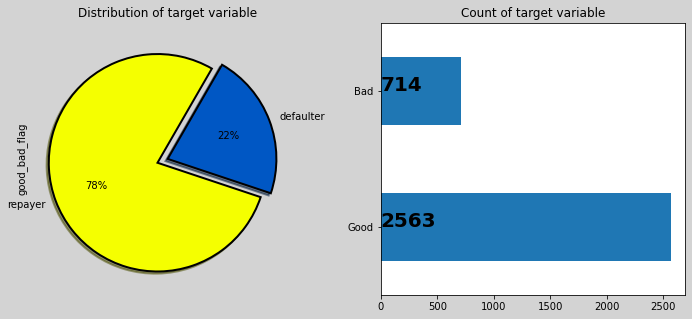

In [12]:
# Distribution of the target variable
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
data["good_bad_flag"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
                                                                             startangle = 60,
                                            labels=["repayer","defaulter"],wedgeprops={"linewidth":2,"edgecolor":"k"},
                                            explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = data["good_bad_flag"].value_counts().plot(kind="barh")

for i,j in enumerate(data["good_bad_flag"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

In [68]:
# Separate the categorical columns and numerical
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)
display("numerical columns in the data")

'numerical columns in the data'

In [69]:
display("numerical columns in the data")
display(numerical_columns)
display("categorical columns in the data")
display(categorical_columns)

'numerical columns in the data'

['systemloanid',
 'loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'longitude_gps',
 'latitude_gps',
 'Age']

'categorical columns in the data'

['customerid',
 'approveddate',
 'creationdate',
 'good_bad_flag',
 'closeddate',
 'firstduedate',
 'firstrepaiddate',
 'birthdate',
 'bank_account_type',
 'bank_name_clients',
 'employment_status_clients']

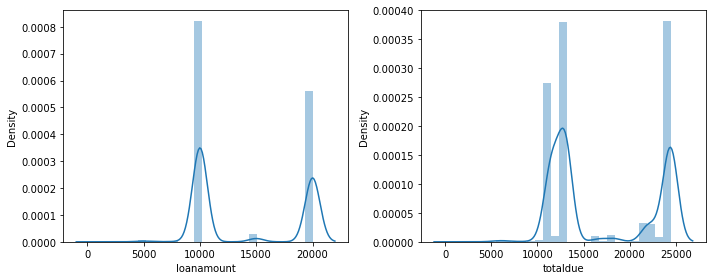

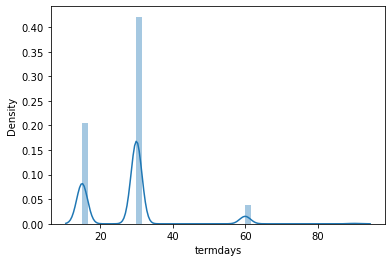

In [70]:
# Histograms

num_cols = ['loanamount', 'totaldue', 'termdays']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(data[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data[num_cols[i]], hist=True, kde=True)

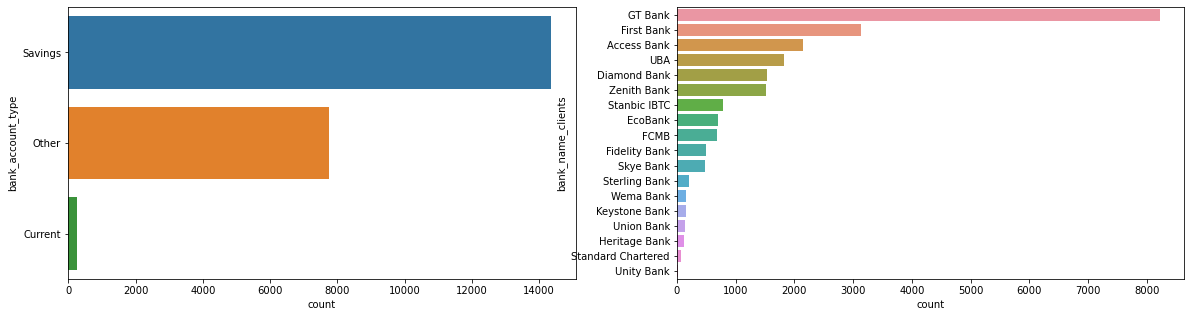

In [84]:
cat_cols = ['bank_account_type','bank_name_clients']
for i in range(0,len(cat_cols),2):
    if len(cat_cols) > i+1:
        plt.figure(figsize=(20,5))
        plt.subplot(121)
        sns.countplot(y=data[cat_cols[i]],data=data,
                     order=data['bank_account_type'].value_counts().index,
                     )
        
        plt.subplot(122)            
        sns.countplot(y=data[cat_cols[i+1]],data=data,
                     order=data['bank_name_clients'].value_counts().index,
                     )
        plt.show();

### 4.3 DATA CLEANING

- Dealing with the missing data.

- Dealing with duplication

- Dealing with outliers


### 4.3.1 Missing Values

#### 4.3.1 Percentage of Missing values in performance data.

In [13]:
df_null_per=data.isnull().sum()/len(data)*100
df_null_per.sort_values(ascending = False)

bank_branch_clients           99.127751
referredby                    92.704419
good_bad_flag                 85.341743
level_of_education_clients    77.017356
firstrepaiddate               19.439971
firstduedate                  19.439971
closeddate                    19.439971
employment_status_clients     11.017177
termdays                       0.000000
totaldue                       0.000000
loanamount                     0.000000
systemloanid                   0.000000
creationdate                   0.000000
approveddate                   0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
loannumber                     0.000000
customerid                     0.000000
dtype: float64

In [14]:
data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag', 'closeddate', 'firstduedate', 'firstrepaiddate',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients'],
      dtype='object')

In [15]:
# threshold for the columns to delete.
data = data.drop(columns=['bank_branch_clients','referredby','level_of_education_clients'],axis=1)

#### Dealing with Missing Values.

If the missing values % is more than 5 % mean, mode and median would not be effective so i settled on imputer the missing values.

In [16]:
data['employment_status_clients'].unique()

array(['Permanent', nan, 'Unemployed', 'Self-Employed', 'Student',
       'Retired', 'Contract'], dtype=object)

In [17]:
# fill the missing values using fill forward.
data['employment_status_clients']=data['employment_status_clients'].fillna(method ='Ffill')

In [18]:
data['approveddate']=pd.to_datetime(data['approveddate'], errors ='coerce')
data['approveddate']=data['approveddate'].dt.date

In [19]:
# We will replace the missign value of the first due date to approved date add 30 days.
data['firstduedate']=data['firstduedate'].fillna(data['approveddate'] + data['termdays'].map(dt.timedelta))

In [20]:
# We will replace the closed date using the mean no of days from due date to closed date.
data['firstduedate']=pd.to_datetime(data['firstduedate'])
data['firstduedate']=data['firstduedate'].dt.date
data['closeddate']=pd.to_datetime(data['closeddate'])
data['closeddate']=data['closeddate'].dt.date
data['firstrepaiddate']=pd.to_datetime(data['firstrepaiddate'])
data['firstrepaiddate']=data['firstrepaiddate'].dt.date


In [21]:
# We will replace the closed date using the mean no of days from due date to closed date.
data['closeddate']= data['closeddate'].fillna(data['firstduedate'])

In [22]:
data['birthdate']=pd.to_datetime(data['birthdate'])#, errors ='coerce')
data['birthdate']=data['birthdate'].dt.date

In [23]:
# Since based on the data the missing values are good payers we assume that they paid on the due date.
data['firstrepaiddate']= data['closeddate'].fillna(data['firstduedate'])

In [45]:
# Age of the policy holder.This function converts given date to age
import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
data['Age']=data['birthdate'].apply(lambda x: from_dob_to_age(x))

In [24]:
df_null_per=data.isnull().sum()/len(data)*100
df_null_per.sort_values(ascending = False)

good_bad_flag                85.341743
closeddate                    2.786724
firstduedate                  2.786724
approveddate                  2.786724
firstrepaiddate               2.786724
bank_name_clients             0.000000
latitude_gps                  0.000000
longitude_gps                 0.000000
bank_account_type             0.000000
birthdate                     0.000000
customerid                    0.000000
systemloanid                  0.000000
termdays                      0.000000
totaldue                      0.000000
loanamount                    0.000000
creationdate                  0.000000
loannumber                    0.000000
employment_status_clients     0.000000
dtype: float64

### 4.3.1 Outliers

In [27]:
numerical_columns = data[['loanamount','totaldue','termdays']]

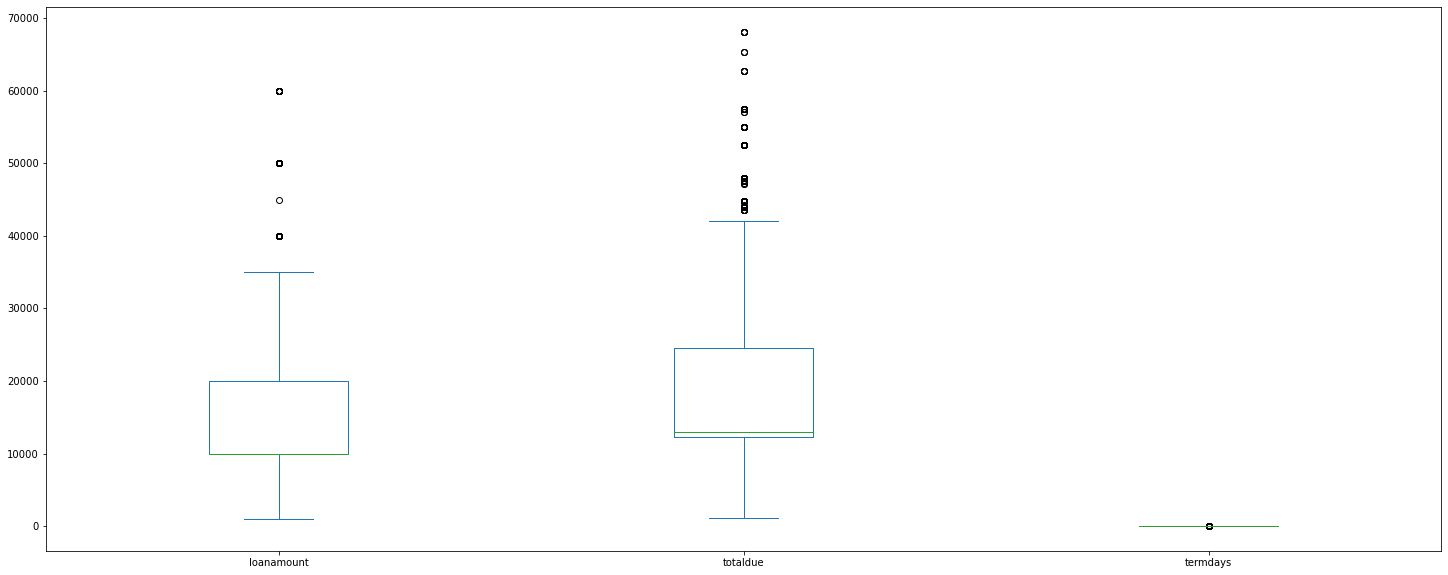

In [28]:
# indentify the outliers in the datasets
numerical_columns.plot(figsize=(25,10),kind='box')
plt.show()

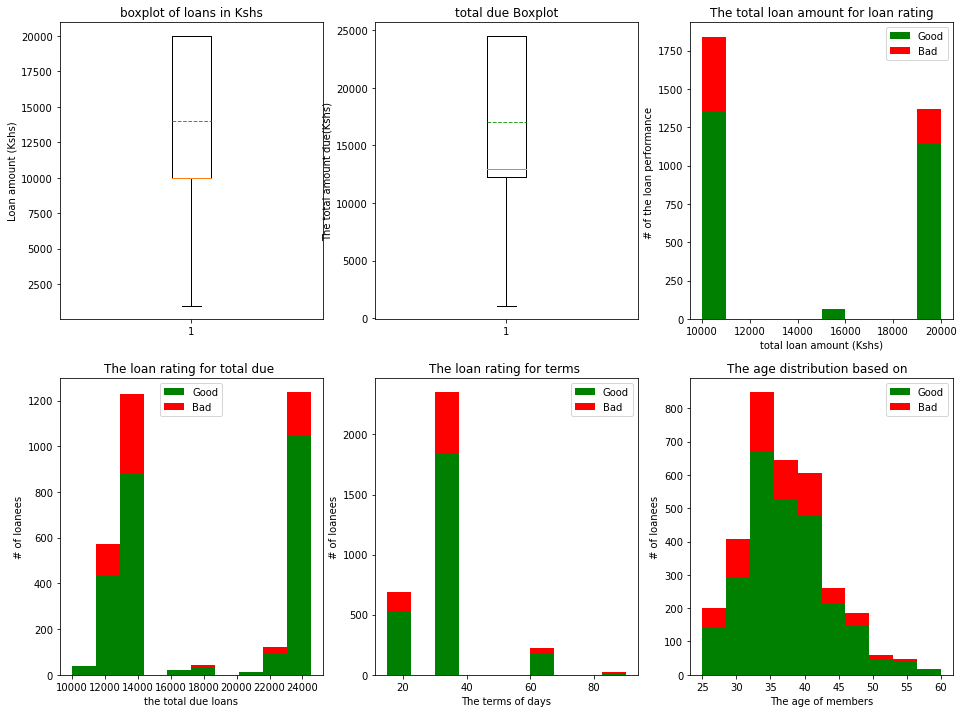

In [51]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data['loanamount'], showmeans = True, meanline = True)
plt.title('boxplot of loans in Kshs')
plt.ylabel('Loan amount (Kshs)')

plt.subplot(232)
plt.boxplot(data['totaldue'], showmeans = True, meanline = True)
plt.title('total due Boxplot')
plt.ylabel('The total amount due(Kshs)')


plt.subplot(233)
plt.hist(x = [data[data['good_bad_flag']=='Good']['loanamount'], data[data['good_bad_flag']=='Bad']['loanamount']], 
         stacked=True, color = ['g','r'],label = ['Good','Bad'])
plt.title('The total loan amount for loan rating')
plt.xlabel('total loan amount (Kshs)')
plt.ylabel('# of the loan performance ')
plt.legend()

plt.subplot(234)
plt.hist(x = [data[data['good_bad_flag']=='Good']['totaldue'], data[data['good_bad_flag']=='Bad']['totaldue']], 
         stacked=True, color = ['g','r'],label = ['Good','Bad'])
plt.title('The loan rating for total due ')
plt.xlabel('the total due loans')
plt.ylabel('# of loanees')
plt.legend()

plt.subplot(235)
plt.hist(x = [data[data['good_bad_flag']=='Good']['termdays'], data[data['good_bad_flag']=='Bad']['termdays']], 
         stacked=True, color = ['g','r'],label = ['Good','Bad'])
plt.title('The loan rating for terms ')
plt.xlabel('The terms of days')
plt.ylabel('# of loanees')
plt.legend();

plt.subplot(236)
plt.hist(x = [data[data['good_bad_flag']=='Good']['Age'], data[data['good_bad_flag']=='Bad']['Age']], 
         stacked=True, color = ['g','r'],label = ['Good','Bad'])
plt.title('The age distribution based on  ')
plt.xlabel('The age of members')
plt.ylabel('# of loanees')
plt.legend();


In [31]:
Q1=data['totaldue'].quantile(0.25)
Q2=data['totaldue'].quantile(0.50)
Q3=data['totaldue'].quantile(0.75)
min = data['totaldue'].min()
max = data['totaldue'].max()
print(Q1)
print(Q2)
print(Q3)
print(min)
print(max)

12250.0
13000.0
24500.0
1112.5
68100.0


In [32]:
# replace outliers than 75% to return 75%
data['totaldue']= np.where(data['totaldue'] > Q3, Q3, data['totaldue'])

In [33]:
Q1=data['loanamount'].quantile(0.25)
Q2=data['loanamount'].quantile(0.50)
Q3=data['loanamount'].quantile(0.75)
min = data['loanamount'].min()
max = data['loanamount'].max()
print(Q1)
print(Q2)
print(Q3)
print(min)
print(max)

10000.0
10000.0
20000.0
1000.0
60000.0


In [34]:
# replace outliers than 75% to return 75%
data['loanamount']= np.where(data['loanamount'] > Q3, Q3, data['loanamount'])

In [35]:
data.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,2.235600e+04,22356.000000,22356.000000,22356.000000,22356.000000,22356.000000,22356.000000
mean,3.018665e+08,4.387055,14008.275183,17020.614712,27.256441,4.645287,7.266539
std,1.013468e+05,3.411204,4893.166278,5781.108977,11.113370,7.993771,3.225260
min,3.016001e+08,1.000000,1000.000000,1112.500000,15.000000,-118.247009,-33.868818
25%,3.017982e+08,2.000000,10000.000000,12250.000000,15.000000,3.354723,6.468771
50%,3.018886e+08,3.000000,10000.000000,13000.000000,30.000000,3.587802,6.616237
75%,3.019494e+08,6.000000,20000.000000,24500.000000,30.000000,6.437597,7.421333
max,3.020040e+08,34.000000,20000.000000,24500.000000,90.000000,151.209290,71.228069


### 4.4 Feature Engineering

Characterize this variable with external data, such as liquidity ratios(thanks to HB)

- interest
- Dates
- Date of births
- locations

## 5. Feature Selection

### 5.1 Correlation

Text(0.5, 1.0, 'demographics')

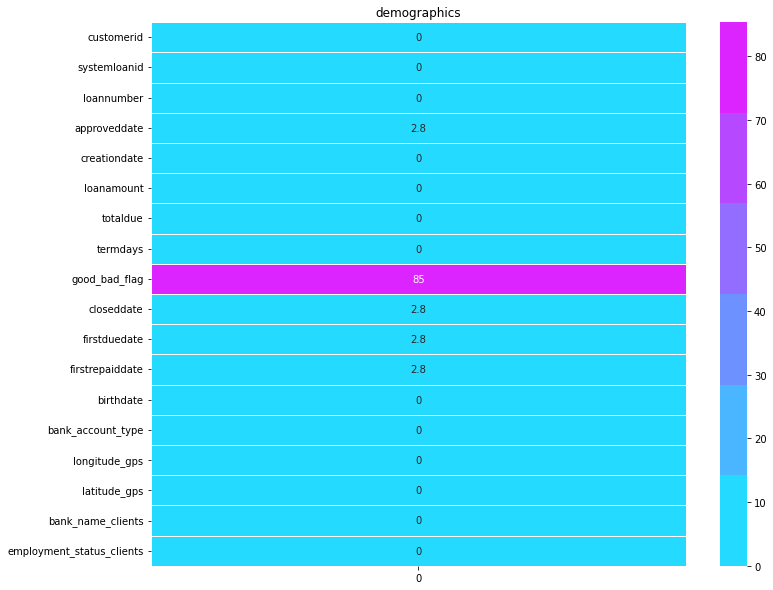

In [36]:
plt.figure(figsize=(12,10))

sns.heatmap(pd.DataFrame(data.isnull().sum()/data.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("demographics")

##### Visualize Distribution of Correlated Variables

In [37]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=16);

KeyError: "None of [Index(['target'], dtype='object')] are in the [columns]"

<Figure size 576x864 with 0 Axes>

### 5.2 Feature Selection through Feature Importances

We will use a Gradient Boosted Model from the LightGBM library to assess feature importances. 

Since the LightGBM model does not need missing values to be imputed, we can directly fit on the training data. We will use Early Stopping to determine the optimal number of iterations and run the model twice, averaging the feature importances to try and avoid overfitting to a certain set of features.

#### 5.3.1 Feature Importance

It looks like many of the features we made have literally 0 importance. For the gradient boosting machine, features with 0 importance are not used at all to make any splits. Therefore, we can remove these features from the model with no effect on performance.

Let's remove the features that have zero importance.

Now, there are no 0 importance features left. If we want to remove more features, we will create a threshold percentage of importance, such as 95%, to remove less important features.

We can keep only the features needed for 95% importance. 

Then, we can test both versions of the data to see if the extra feature removal step is worthwhile.

---

## 6.0 MODELLING

In [ ]:
# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

---